# Apparent Magnitude of Asteroids #2

Today we will take a look at the change of the apparent magnitude, depending on the phase angle.

In our example, we will set a "steady-state" vector for Earth in 2 dimenions. The "sample" NEO will be placed on a circular, 2 AU orbit. Then, we compute its brightness for all orbit positions (as seen from Earth).

In [1]:
# Standard libraries
import math
import pathlib
import sqlite3
import sys
import typing as t

# Installed libraries
import numpy as np
import pandas as pd
import spiceypy

In [2]:
# Append to root directory of this repository
sys.path.append("../")

# Auxiliary module that contains the apparent magnitude
from auxiliary import photometry

In [3]:
# "Sample" properties of our NEO
sample_abs_mag = 10.0
sample_slope_g = 0.15

# Earth's positions on a 2D plane (in AU)
static_obs_vec = np.array([-1.0, 0.0])

In [4]:
# Let's create a simple function to compute cartesian coordiantes, based on polar ones
def polar2cart(phi, r=2):
    
    # The polar angle is given in degrees
    phi_rad = np.radians(phi)
    
    # Compute the coordiantes
    x_coord = r * np.cos(phi_rad)
    y_coord = r * np.sin(phi_rad)
    
    return np.array([x_coord, y_coord])

In [5]:
# Compute a set of the NEO's position
phi_range = np.linspace(0, 360, 1000)
sample_vec_ill2obj = [polar2cart(k) for k in phi_range]

# And invert the values
sample_vec_obj2ill = [-1.0 * k  for k in sample_vec_ill2obj]

In [6]:
# Compute the vector from the NEO to the observer (Earth)
sample_vec_obj2obs = [k+static_obs_vec for k in sample_vec_obj2ill]

In [7]:
# Compute now the apparent magnitude for the different positions
sample_app_mag = [photometry.hg_app_mag(
                      abs_mag=sample_abs_mag,
                      vec_obj2obs=k,
                      vec_obj2ill=k2,
                      slope_g=sample_slope_g)
                  for k, k2 in zip(sample_vec_obj2obs, sample_vec_obj2ill)
                 ]

In [8]:
# Compute the phase angle between the Sun and Earth (as seen from the NEO)
sample_phase_angle = [np.degrees(
                          np.arccos(
                                    np.dot(vec1, vec2) \
                                    / (np.linalg.norm(vec1) * np.linalg.norm(vec2))
                                   )
                                )
                      for vec1, vec2 in zip(sample_vec_obj2obs, sample_vec_obj2ill)
                     ]

(11.0, 15.0)

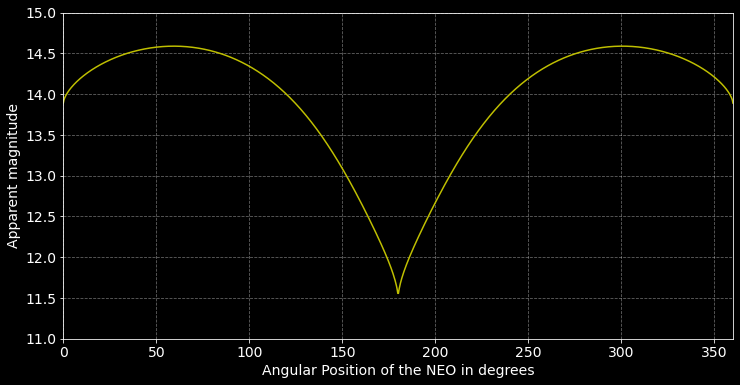

In [9]:
from matplotlib import pyplot as plt

# Let's set a dark background
plt.style.use('dark_background')

# Set a default font size for better readability
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(12, 6))
plt.plot(phi_range, sample_app_mag, "y")

plt.grid(linestyle='dashed', alpha=0.4)

plt.xlabel("Angular Position of the NEO in degrees")
plt.ylabel("Apparent magnitude")

plt.xlim(0, 360)
plt.ylim(11, 15)

(11.0, 15.0)

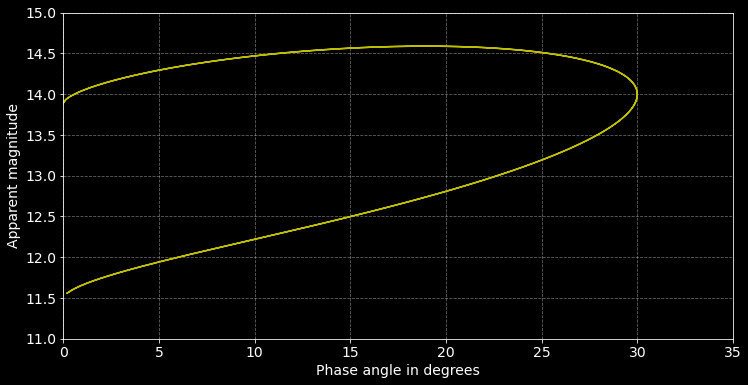

In [10]:
from matplotlib import pyplot as plt

# Let's set a dark background
plt.style.use('dark_background')

# Set a default font size for better readability
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(12, 6))
plt.plot(sample_phase_angle, sample_app_mag, "y")

plt.grid(linestyle='dashed', alpha=0.4)

plt.xlabel("Phase angle in degrees")
plt.ylabel("Apparent magnitude")

plt.xlim(0, 35)
plt.ylim(11, 15)

In [11]:
# Compute the distance between the NEO and Earth
sample_dist_obj2obs = np.linalg.norm(sample_vec_obj2obs, axis=1)

(0.0, 35.0)

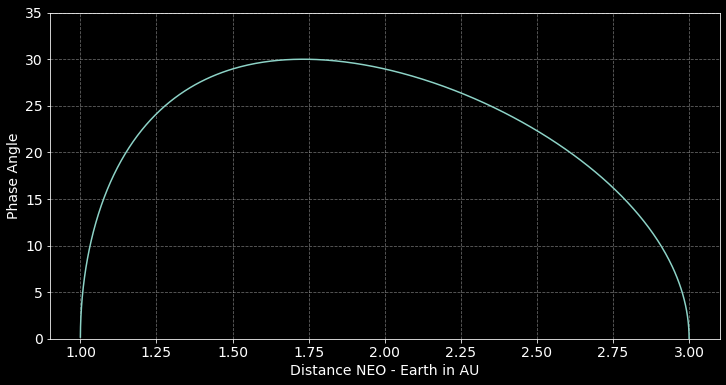

In [12]:
from matplotlib import pyplot as plt

# Let's set a dark background
plt.style.use('dark_background')

# Set a default font size for better readability
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(12, 6))

plt.plot(sample_dist_obj2obs[:500], sample_phase_angle[:500])

plt.grid(linestyle='dashed', alpha=0.4)
plt.xlabel("Distance NEO - Earth in AU")
plt.ylabel("Phase Angle")
plt.xlim(0.9, 3.1)
plt.ylim(0, 35)